In [9]:
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile
import librosa
import soundfile as sf
from pydub import AudioSegment
from pydub.silence import split_on_silence
import IPython.display as ipd
from scipy.fftpack import dct

/opt/anaconda3/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [10]:
def print_properties(s, sr):
    print("Shape        ",s.shape)
    print("Type         ",s.dtype)
    print("Sample rate  ",sr)
    print("Seconds      ",s.shape[0]/sr)
    return None

def plot_signal(sig,sr):
    t = [i/sr for i in range(len(sig))]
    
    fig = plt.figure(figsize=(16,9))
    plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=None, hspace=None)
    ax1 = fig.add_subplot(211)
    ax1 = sns.lineplot(x=t,y=sig)
    ax1.set_title('Time domain')
    ax1.set_ylabel('Amplitude')
    ax1.set_xlabel('Seconds')
    ax1.set_xlim([t[0],t[-1]])
    
    ax2 = fig.add_subplot(212)
    if(len(sig) < 256):
        z = np.zeros(int(256 - len(sig)))
        sig = np.append(sig, z)
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sig, Fs=sr)
    ax2.set_title('Frequency domain')
    ax2.set_ylabel('Frequency')
    ax2.set_xlabel('Seconds')
    return None

In [37]:
audios_dir = os.listdir("./audios/")
audios = []
for file in audios_dir:
    audios.append("./audios/" + file)

In [38]:
audios

['./audios/4788-91208-0010.txt',
 './audios/1183-124566-0003.txt',
 './audios/4680-16041-0025.txt']

In [39]:
f = open(audios[0], "r")
audio1 = f.read()

In [42]:
print(audio1.split(","))

['0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004687242', '0.0004

In [34]:
print(len(audio1[1:-1].split(" ")))

11


In [ ]:
samples = []
for r in audio1.split(","):
    print(r)
    #samples.append(float(r))

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242
0.0004687242

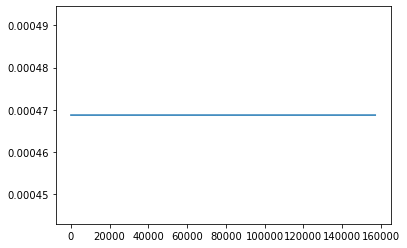

In [44]:
plt.plot(samples)